<a href="https://colab.research.google.com/github/pijuma/Facul/blob/main/algelin/PCA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVD

In [ ]:
#comprimir imagem
#eigh (numpy) pra achar sigma^2
#gera imagem transforma na escala cinza
# usa eigh pra achar sigma^2

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imagem = Image.open('svd.jpg').convert('L')
A = np.array(imagem)
A = np.asarray(imagem)
plt.axis('off')
plt.imshow(A, cmap='gray')
print(imagem)

FileNotFoundError: [Errno 2] No such file or directory: '/content/svd.jpg'

In [ ]:
A = imagem
array = np.array(A, dtype=np.float64)
At = np.transpose(A)

#Calcular a matriz de covariância e obtenha os valores singulares e vetores
mult = np.dot(array, array.T)
sigma, U = np.linalg.eigh(mult)

# Ordenar os valores singulares e autovetores
sorted_indices = np.argsort(sigma)[::-1]
sigma = sigma[sorted_indices]
sigma[sigma < 0] = 0  # Definir valores negativos como zero (em caso de pequenas imprecisões)
sigma = np.sqrt(sigma)  # Valores singulares são a raiz quadrada dos autovalores
U = U[:, sorted_indices]  # Reordene as colunas de U
# U[sorted_indices, :] ordenaria as linhas

# Calcule V utilizando U e A
V = np.dot(U.T, A) / sigma[:, np.newaxis]  # Normalizando cada linha de V

k = 510 #qto de informação queremos armazenar

# Reduzir as dimensões de U, sigma e V para k
U_k = U[:, :k]  # m x k
sigma_k = np.diag(sigma[:k])  # k x k
VT = V[:k, :] # k x n

NameError: name 'imagem' is not defined

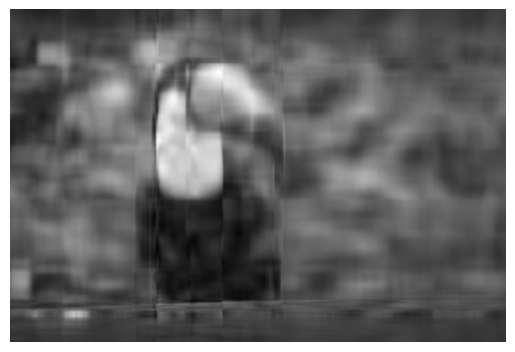

In [ ]:

# Reconstruir a imagem comprimida
# A = U*sigma*VT
# sigma = autovalores
# U => autovetores de A*AT
# V => autovetores de AT*A
Ak = np.dot(U_k, np.dot(sigma_k, VT))

# Exibir a imagem reconstruída
plt.axis('off')
plt.imshow(Ak, cmap='gray')
plt.show()

**PCA**

Aplicar PCA nos dados de diabetes e ver para quantas componentes teremos uma separação considerável dos dados

PCA é uma parte do SVD

1) Pegar os dados e padronizá-los para a N(0, 1), o PCA é sensível a escalas variáveis, se não fizermos isso variáveis com maior variância irão dominar as componentes principais

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [ ]:
#receber os dados e converter para page frame
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

#normalizar os dados

for coluna in X.columns:
  media = X[coluna].mean()
  dp = X[coluna].std()
  X[coluna] = (X[coluna]-media)/dp

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458
...,...,...,...,...,...,...,...,...,...,...
437,0.875877,1.064282,0.412892,1.254619,-0.119633,-0.053896,-0.602160,-0.054438,0.655045,0.151337
438,-0.115806,1.064282,-0.334032,-1.420477,1.036167,1.662471,-0.602160,0.720486,-0.380388,0.934195
439,0.875877,1.064282,-0.334032,0.363161,-0.784218,-0.290636,-0.524846,-0.232670,-0.984533,0.325305
440,-0.954922,-0.937474,0.820305,0.025521,0.342687,0.320943,-0.602160,0.557752,0.935103,-0.544537


2) calcular a matriz de covariância

    sigma = X^T*X/n-1

Em que X é a matriz normalizada

A matriz sigma terá como diagonal principal as variâncias e no resto a covariância entre os valores, nosso objetivo é tornar a matriz apenas diagonal, ou seja, fazer com que a covariância das componentes seja nula, em resumo fazer com que elas são independentes entre si. Se duas componentes tiverem uma covariância alta significa que os dados são muito relacionados, ou seja, temos redundância.

Calculariamos a covariância como E(X-mi)*(X-mi)^T mas após normalizar os dados mi = 0, portanto podemos apenas fazer o cálculo de cima.

In [ ]:
N = len(X)
sigma = np.dot(X.T, X)/(N-1)

sigma

array([[ 1.        ,  0.1737371 ,  0.18508467,  0.33542759,  0.26006082,
         0.21924314, -0.07518097,  0.2038409 ,  0.27077424,  0.30173101],
       [ 0.1737371 ,  1.        ,  0.0881614 ,  0.24101049,  0.03527682,
         0.14263726, -0.37908963,  0.33211509,  0.14991614,  0.20813322],
       [ 0.18508467,  0.0881614 ,  1.        ,  0.3954109 ,  0.24977742,
         0.26116991, -0.36681098,  0.4138066 ,  0.44615654,  0.38867999],
       [ 0.33542759,  0.24101049,  0.3954109 ,  1.        ,  0.24246402,
         0.18554846, -0.17876163,  0.25765005,  0.39348011,  0.39043002],
       [ 0.26006082,  0.03527682,  0.24977742,  0.24246402,  1.        ,
         0.89666296,  0.05151936,  0.54220728,  0.51550292,  0.32571675],
       [ 0.21924314,  0.14263726,  0.26116991,  0.18554846,  0.89666296,
         1.        , -0.19645512,  0.65981689,  0.31835667,  0.29060038],
       [-0.07518097, -0.37908963, -0.36681098, -0.17876163,  0.05151936,
        -0.19645512,  1.        , -0.73849273

3) Calcular os autovalores e autovetores de sigma e ordenar pelo maior autovalor

In [ ]:
autovalores, autovetores = np.linalg.eig(sigma)
idx = autovalores.argsort()[::-1]
autovalores = autovalores[idx]
autovetores = autovetores[:, idx]

4) queremos escolher quantas componentes iremos manter (k), pegamos os k maiores autovalores

In [ ]:
k = 3
autovalores_k = autovalores[:k]
#seleciona apenas os k primeiros valores do vetor
autovetores_k = autovetores[:, :k]
#seleciona as k primeiras colunas de autovetores que sao associados aos k mairoes autovalores

In [ ]:
#qual a variância explicada? Quanto de info estamos mantendo?
variancia_explicada = np.sum(autovalores_k)/ np.sum(autovalores)
print(f"{variancia_explicada:.5f}")

0.67225


5) pegar a matriz com os autovetores escolhidos na coluna e multiplicar pela matriz dos pontos iniciais normalizados

In [ ]:
P = autovetores_k
Y = np.dot(X, P)

6) Projetar os pontos

In [ ]:
s6 = X['s6']
s6_levels = pd.cut(s6, bins=[s6.min(), s6.quantile(0.33), s6.quantile(0.66), s6.max()],
                   labels=['Baixo', 'Normal', 'Alto'])
fig = px.scatter_3d(
    x=Y[:, 0], y=Y[:, 1], z=Y[:, 2],
    color=s6_levels,
     color_discrete_sequence=px.colors.qualitative.Bold,
    labels={'color': 'Nível de Glicose (s6)'},
    title='Projeção PCA com 3 Componentes Principais e Níveis de Glicose (s6)'
)
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

#receber os dados e converter para page frame
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)
X = pd.DataFrame(final_breast_data, columns=np.append(breast.feature_names, 'target'))

#normalizar os dados

for coluna in X.columns:
  media = X[coluna].mean()
  dp = X[coluna].std()
  X[coluna] = (X[coluna]-media)/dp

N = len(X)
sigma = np.dot(X.T, X)/(N-1)

autovalores, autovetores = np.linalg.eig(sigma)
idx = autovalores.argsort()[::-1]
autovalores = autovalores[idx]
autovetores = autovetores[:, idx]

k = 3
autovalores_k = autovalores[:k]
#seleciona apenas os k primeiros valores do vetor
autovetores_k = autovetores[:, :k]
#seleciona as k primeiras colunas de autovetores que sao associados aos k mairoes autovalores

#qual a variância explicada? Quanto de info estamos mantendo?
variancia_explicada = np.sum(autovalores_k)/ np.sum(autovalores)

P = autovetores_k
Y = np.dot(X, P)

fig = px.scatter_3d(
    x=Y[:, 0], y=Y[:, 1], z=Y[:, 2],
    color=X['target'],  # Usar a coluna 'target' para colorir os pontos
    color_continuous_scale=['blue', 'red'],  # Cores para benigno e maligno
    labels={'color': 'Diagnóstico'},
    title='Projeção PCA com 3 Componentes Principais (Benigno vs Maligno)'
)

fig.update_traces(marker=dict(size=3))
fig.show()

Metodo dos minimos Quadrados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mmq_poly(x, y, n): # n eh o grau do polinomio
  A = np.vander(x, n+1) #matriz com as potencias, matriz de vandermon
  AtA = np.dot(A.T, A)
  Atb = np.dot(A.T, y)
  alpha = np.linalg.solve(AtA, Atb)
  return alpha

def emq(y ,f):
    return np.linalg.norm(y-f)**2/f.shape[0]

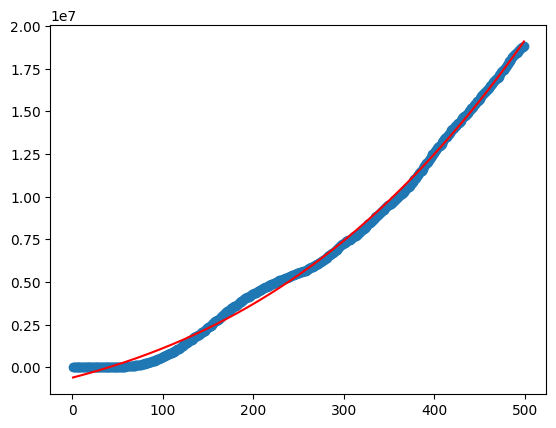

97272874692.23286


In [ ]:
totalcasos = np.genfromtxt(fname='covidcasosacumulados.txt')
dias = np.linspace(1, 499, num=499, endpoint=True)
plt.scatter(dias, totalcasos) #nao lineariza, conecta os pontos apenas

alpha = mmq_poly(dias, totalcasos, 3)

y = np.polyval(alpha, dias)
plt.plot(dias, y, color='red')
plt.show()
erro = emq(y, totalcasos)
print(erro)

SVD - jorge

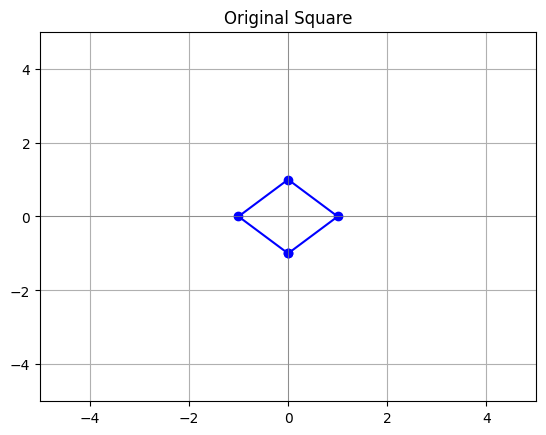

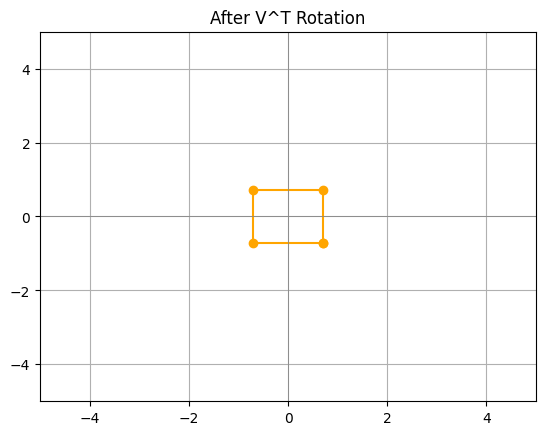

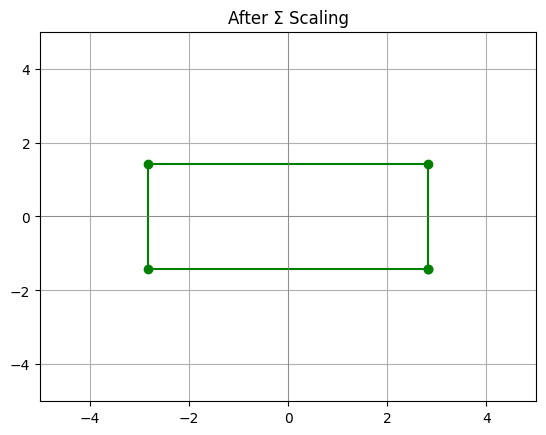

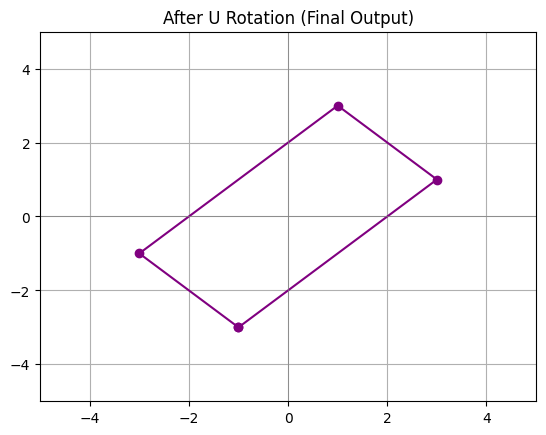

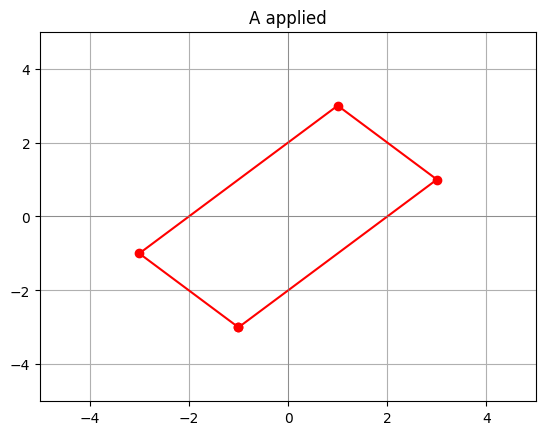

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3, 1], [1, 3]])

U, sigma, VT = np.linalg.svd(A)

Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, sigma)

square = np.array([[0, -1], [-1, 0], [0, 1], [1, 0], [0, -1]])

def plot_transformation(transformed_square, title, color='blue'):
    plt.figure()
    plt.plot(transformed_square[:, 0], transformed_square[:, 1], color=color, marker='o')
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.title(title)
    plt.show()

# Step 1: Original square in the standard basis
plot_transformation(square, "Original Square")

# Step 2: Apply V^T (first rotation)
square_rotated = square @ VT.T
plot_transformation(square_rotated, "After V^T Rotation", color='orange')

# Step 3: Apply Σ (scaling)
square_scaled = square_rotated @ Sigma
plot_transformation(square_scaled, "After Σ Scaling", color='green')

# Step 4: Apply U (final rotation)
square_final = square_scaled @ U
plot_transformation(square_final, "After U Rotation (Final Output)", color='purple')

square_transformed = square @ A

plot_transformation(square_transformed, "A applied", color='red')
